# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [56]:
# Your code here
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
# function to start game

def start_game(ndoors):
    choice = np.random.randint(1, ndoors+1)
    winner = np.random.randint(1, ndoors+1)
    
    return choice, winner


# run game

def game(ndoors, switch_choice=True):
    
    wins = None
    first_pick, winner = start_game(ndoors)
    
    revealable_doors = [dnum for dnum in range(1,ndoors+1) if dnum != first_pick and dnum != winner]
    revealed_door = np.random.choice(revealable_doors)
    available_doors = [num for num in range(1,ndoors+1) if num != first_pick and num != revealed_door]

    if switch_choice == True:
        switch = np.random.choice(available_doors)
        
        if switch == winner:
            wins = 1 
        else:
            wins = 0 
    
    if switch_choice == False:
        if first_pick == winner:
            wins = 1
        else:
            wins = 0 
    
    return wins

In [59]:
num_sim = 10000
wins_no_switch = []
for i in range(num_sim):
    wins_no_switch.append(game(3, False))
    
win_switch = []
for i in range(num_sim):
    win_switch.append(game(3, True))

In [62]:
switch = np.mean(win_switch)
no_swith = np.mean(wins_no_switch)

In [63]:
switch, no_swith

(0.6714, 0.3275)

Simulated Probabilities:
Chance of Winner without switching:  0.3275
Chances of Winning if Door is swithed:  0.6714


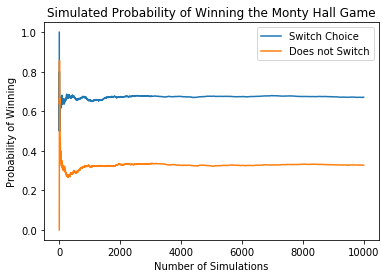

In [67]:
plt.plot(range(1,num_sim+1), [np.mean(win_switch[:i]) for i in range(1,num_sim+1)], label='Switch Choice')
plt.plot(range(1,num_sim+1), [np.mean(wins_no_switch[:i]) for i in range(1,num_sim+1)], label='Does not Switch')
plt.ylabel('Probability of Winning')
plt.xlabel('Number of Simulations')
plt.title('Simulated Probability of Winning the Monty Hall Game')
plt.legend()
print('Simulated Probabilities:')
print('Chance of Winner without switching: ', no_swith)
print('Chances of Winning if Door is swithed: ', switch)

## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 